# About the project
The ionosphere is the ionized part of the upper atmosphere of Earth (ionized by (mostly) the Sun's Ultraviolet (UV) radiation), from about 48 km (30 mi) to 965 km (600 mi) and more above sea level, a region that includes the thermosphere and parts of the mesosphere and exosphere. 

It plays an important role in atmospheric electricity and forms the inner edge of the magnetosphere. It has practical importance because, among other functions, it influences radio propagation to distant places on Earth. It also affects GPS signals that travel through this layer.

At heights of above 80 km (50 mi), in the thermosphere, the atmosphere is so thin that free electrons or otherwise called free radicals, can exist for short periods of time before they are captured by a nearby positive ion. The number of these free electrons is sufficient to affect radio propagation. This portion of the atmosphere is partially ionized and contains a plasma which is referred to as the ionosphere.

Due to the ability of ionized atmospheric gases to refract high frequency (HF, or shortwave) radio waves, the ionosphere can reflect radio waves directed into the sky back toward the Earth. Radio waves directed at an angle into the sky can return to Earth beyond the horizon. This technique, called "skip" or "skywave" propagation, has been used since the 1920s to communicate at international or intercontinental distances. 

<img src="skywave-propagation.png" width="520">

The returning radio waves can reflect off the Earth's surface into the sky again, allowing greater ranges to be achieved with multiple hops, a hop being from one station to another. This communication method is variable and unreliable, with reception over a given path depending on time of day or night, the seasons, weather, and the 11-year sunspot cycle. During the first half of the 20th century it was widely used for transoceanic telephone and telegraph service, and business and diplomatic communication. 

Due to its relative unreliability, shortwave radio communication has been mostly abandoned by the telecommunications industry, though it remains important for high-latitude communication where satellite-based radio communication is not possible.

### Mechanism of refraction
When a radio wave reaches the ionosphere, the electric field in the wave forces the electrons in the ionosphere into oscillation at the same frequency as the radio wave. Some of the radio-frequency energy is given up to this resonant oscillation. The oscillating electrons will then either be lost to recombination or will re-radiate the original wave energy. Total refraction can occur when the collision frequency of the ionosphere is less than the radio frequency, and if the electron density in the ionosphere is great enough.

The critical frequency is the limiting frequency at or below which a radio wave is reflected by an ionospheric layer at vertical incidence. If the transmitted frequency is higher than the plasma frequency of the ionosphere, then the electrons cannot respond fast enough, and they are not able to re-radiate the signal. It is calculated as shown below:

$f_{{{\text{critical}}}}=9\times{\sqrt{N}}$

where N = electron density per cu.m and critical frequency is in Hz.

The Maximum Usable Frequency (MUF) is defined as the upper frequency limit that can be used for transmission between two points at a specified time.

$f_{{\text{muf}}}={\frac{f_{{\text{critical}}}}{\sin\alpha}}$

where $\alpha$  = angle of arrival, the angle of the wave relative to the horizon, and sin is the sine function.

It is a given that these are not the only thing that determine the reflectivity of the ionosphere like Ionograms which show the virtual heights and critical frequencies of the ionospheric layers and which are measured by an ionosonde. An ionosonde sweeps a range of frequencies, usually from 0.1 to 30 MHz, transmitting at vertical incidence to the ionosphere based on which the critical frequencies of operations at different altitudes are set among many other techniques.

In this project we'll be creating models to train on radar data to determine whether the targetted area of the atmosphere, i.e., ionosphere will be able to reflect the signal transmitted in that direction. This is a binary classification problem and compare the models for their accuracy in estimating the reflectivity as good or bad.

# About the dataset
The data used is provided by the [UCI Irvine Machine Learning Repository](https://archive.ics.uci.edu/) and the dataset used is [Ionosphere](https://archive.ics.uci.edu/dataset/52/ionosphere).

There are 351 instances in total (small dataset) with 34 unnamed attributes.

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.  

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system.  Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_SEED = 108
LABELS = ["Bad", "Good"]

# Exploring the data

In [2]:
df = pd.read_csv('ionosphere.data')
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col26,col27,col28,col29,col30,col31,col32,col33,col34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
df.isnull().values.any()

False

In [5]:
df.loc[df["class"] == "g", "class"] = 1
df.loc[df["class"] == "b", "class"] = 0
df["class"].value_counts()

class
1    225
0    126
Name: count, dtype: int64

The good class is nearly double the bad class. Let's see if regular training will give good results.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    351 non-null    int64  
 1   col2    351 non-null    int64  
 2   col3    351 non-null    float64
 3   col4    351 non-null    float64
 4   col5    351 non-null    float64
 5   col6    351 non-null    float64
 6   col7    351 non-null    float64
 7   col8    351 non-null    float64
 8   col9    351 non-null    float64
 9   col10   351 non-null    float64
 10  col11   351 non-null    float64
 11  col12   351 non-null    float64
 12  col13   351 non-null    float64
 13  col14   351 non-null    float64
 14  col15   351 non-null    float64
 15  col16   351 non-null    float64
 16  col17   351 non-null    float64
 17  col18   351 non-null    float64
 18  col19   351 non-null    float64
 19  col20   351 non-null    float64
 20  col21   351 non-null    float64
 21  col22   351 non-null    float64
 22  co

We would like to have our class as int type.

In [9]:
df['class'] = df['class'].astype('int').apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    351 non-null    int64  
 1   col2    351 non-null    int64  
 2   col3    351 non-null    float64
 3   col4    351 non-null    float64
 4   col5    351 non-null    float64
 5   col6    351 non-null    float64
 6   col7    351 non-null    float64
 7   col8    351 non-null    float64
 8   col9    351 non-null    float64
 9   col10   351 non-null    float64
 10  col11   351 non-null    float64
 11  col12   351 non-null    float64
 12  col13   351 non-null    float64
 13  col14   351 non-null    float64
 14  col15   351 non-null    float64
 15  col16   351 non-null    float64
 16  col17   351 non-null    float64
 17  col18   351 non-null    float64
 18  col19   351 non-null    float64
 19  col20   351 non-null    float64
 20  col21   351 non-null    float64
 21  col22   351 non-null    float64
 22  co

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
X.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17',
       'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25',
       'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33',
       'col34'],
      dtype='object')

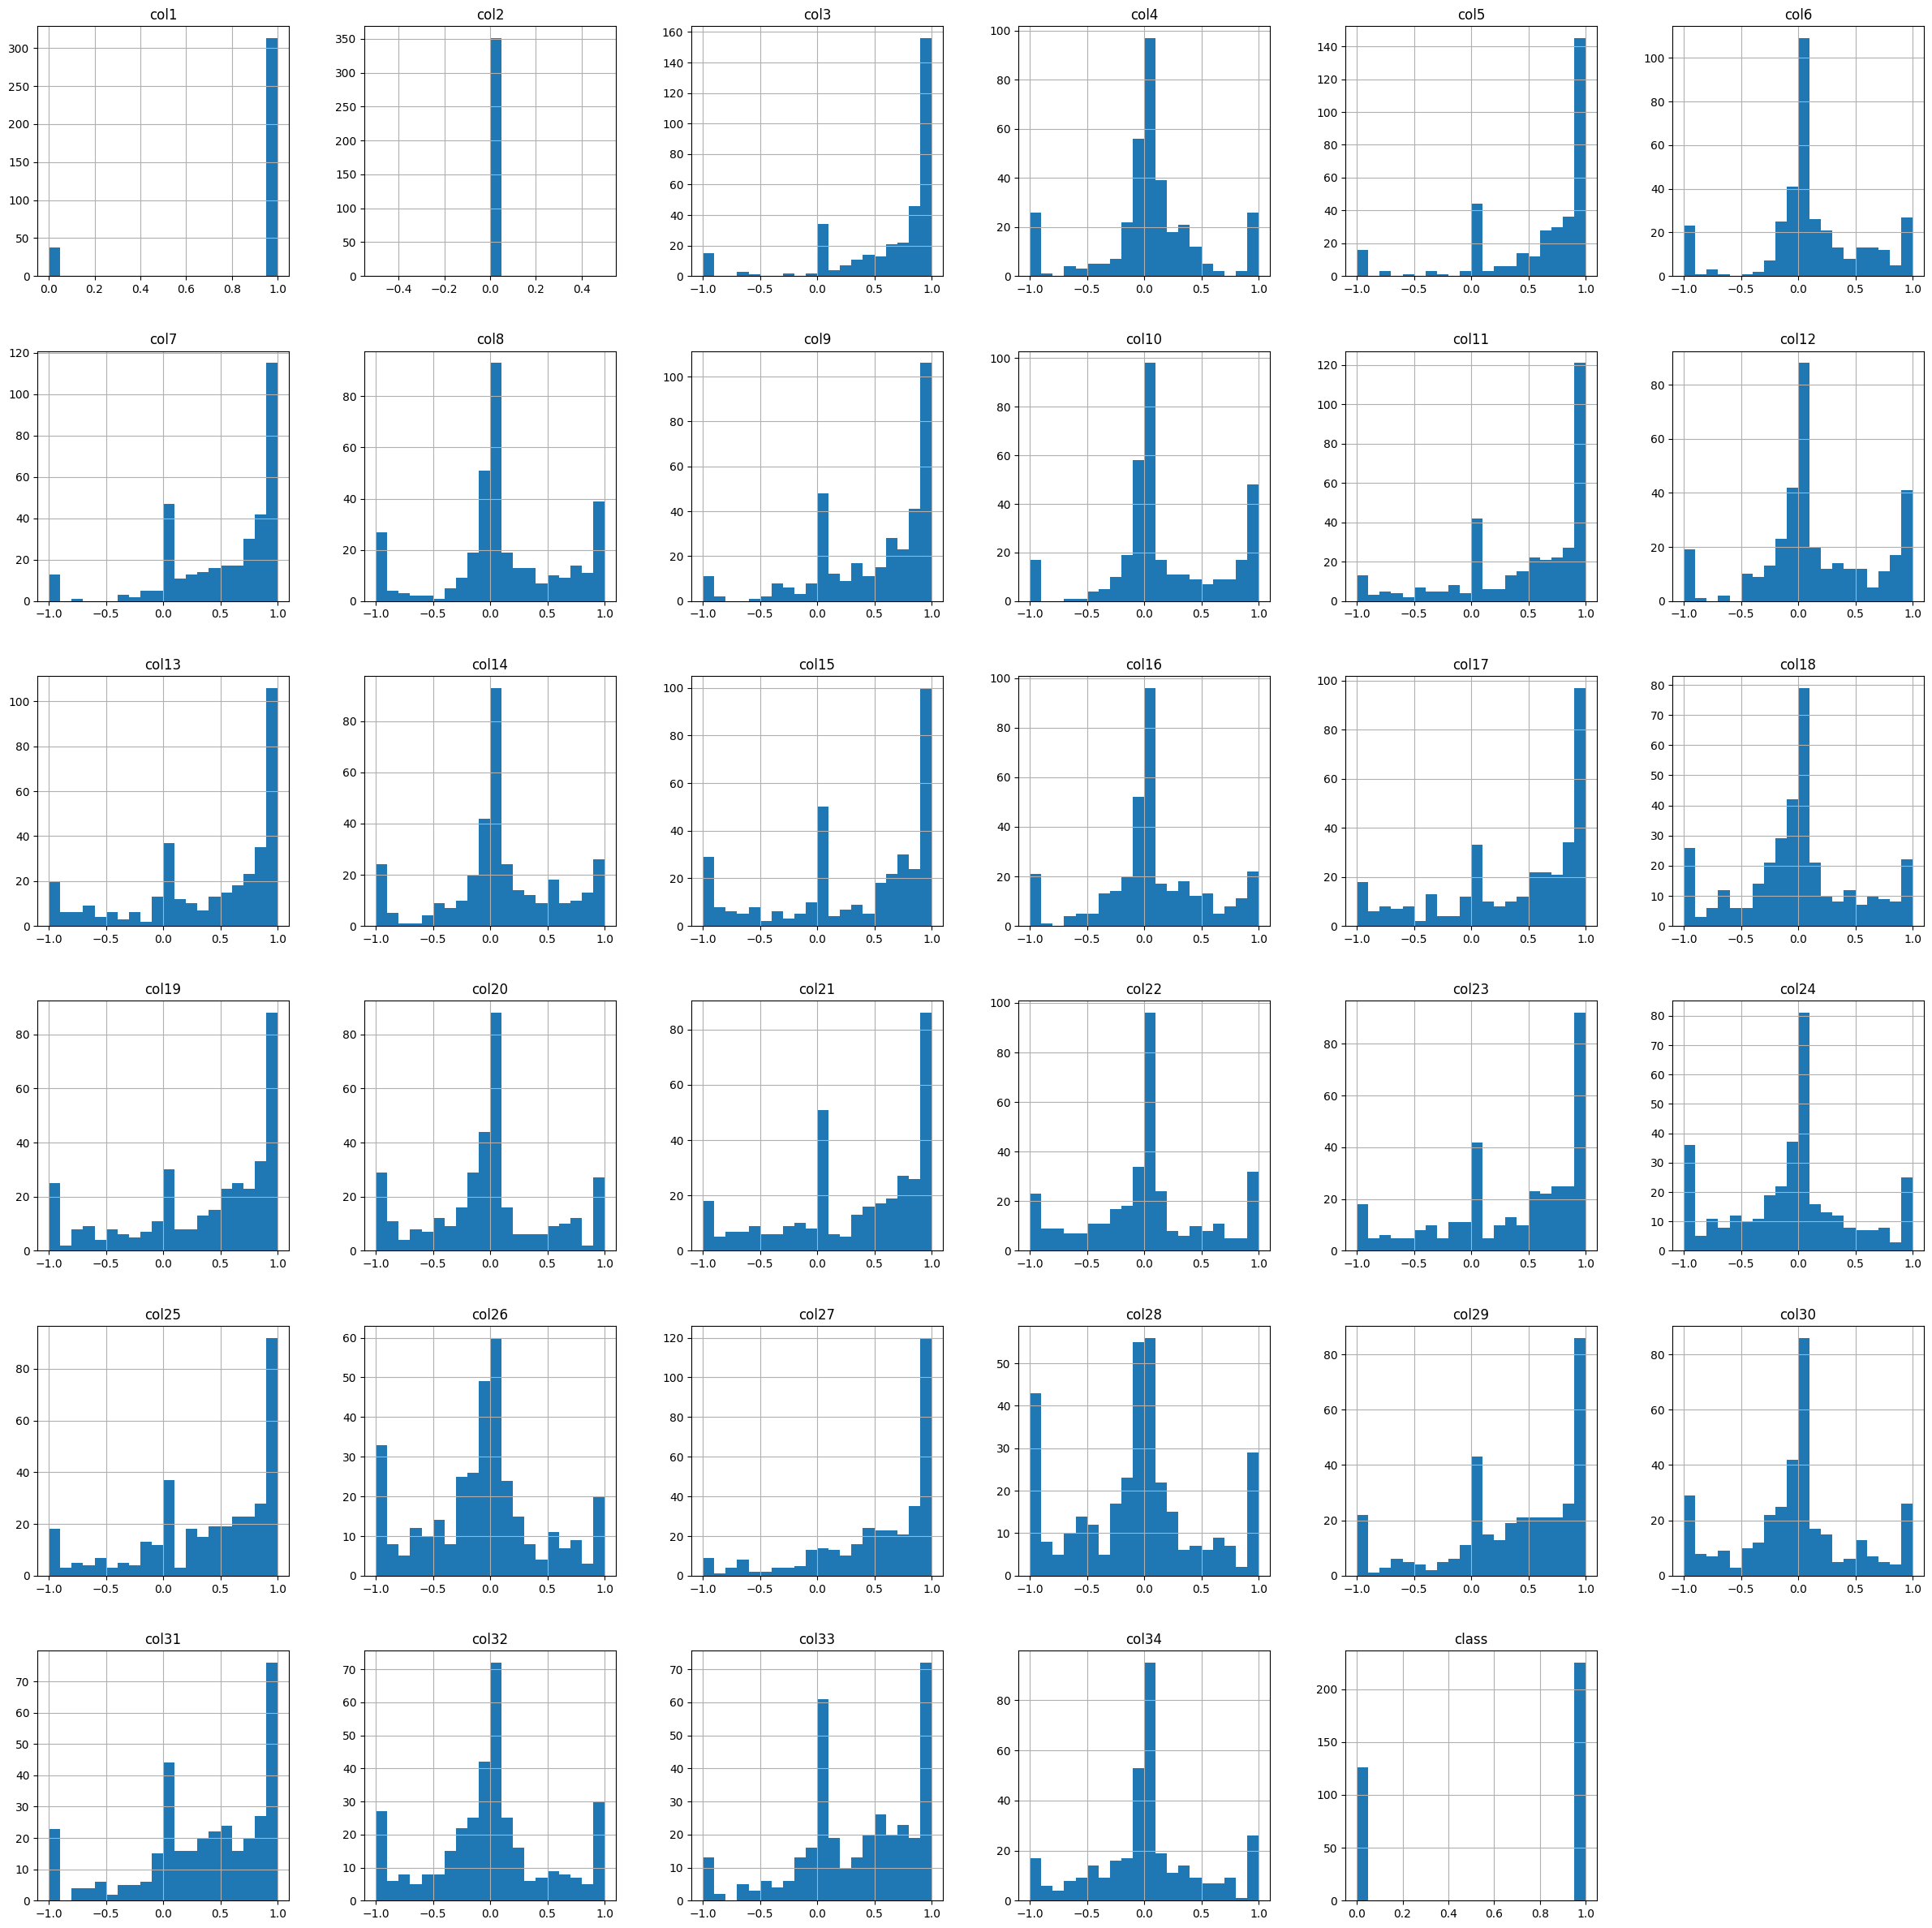

In [12]:
df.hist(bins=20, figsize=(30, 30));

The features seem to take values very close to the feature's mean value with a pretty small standard deviation but half the features seem to have mean near 0 and the rest have >=0.3 mean and the standard deviation too seems very varied. We will consider feature scaling using standardization and bring all the feature to a 0 mean and standard deviation of 1.

Features col1 which either take 0 or 1 and col2 takes only 0 as its value so we'll try removing col2 since it shows zero varience.

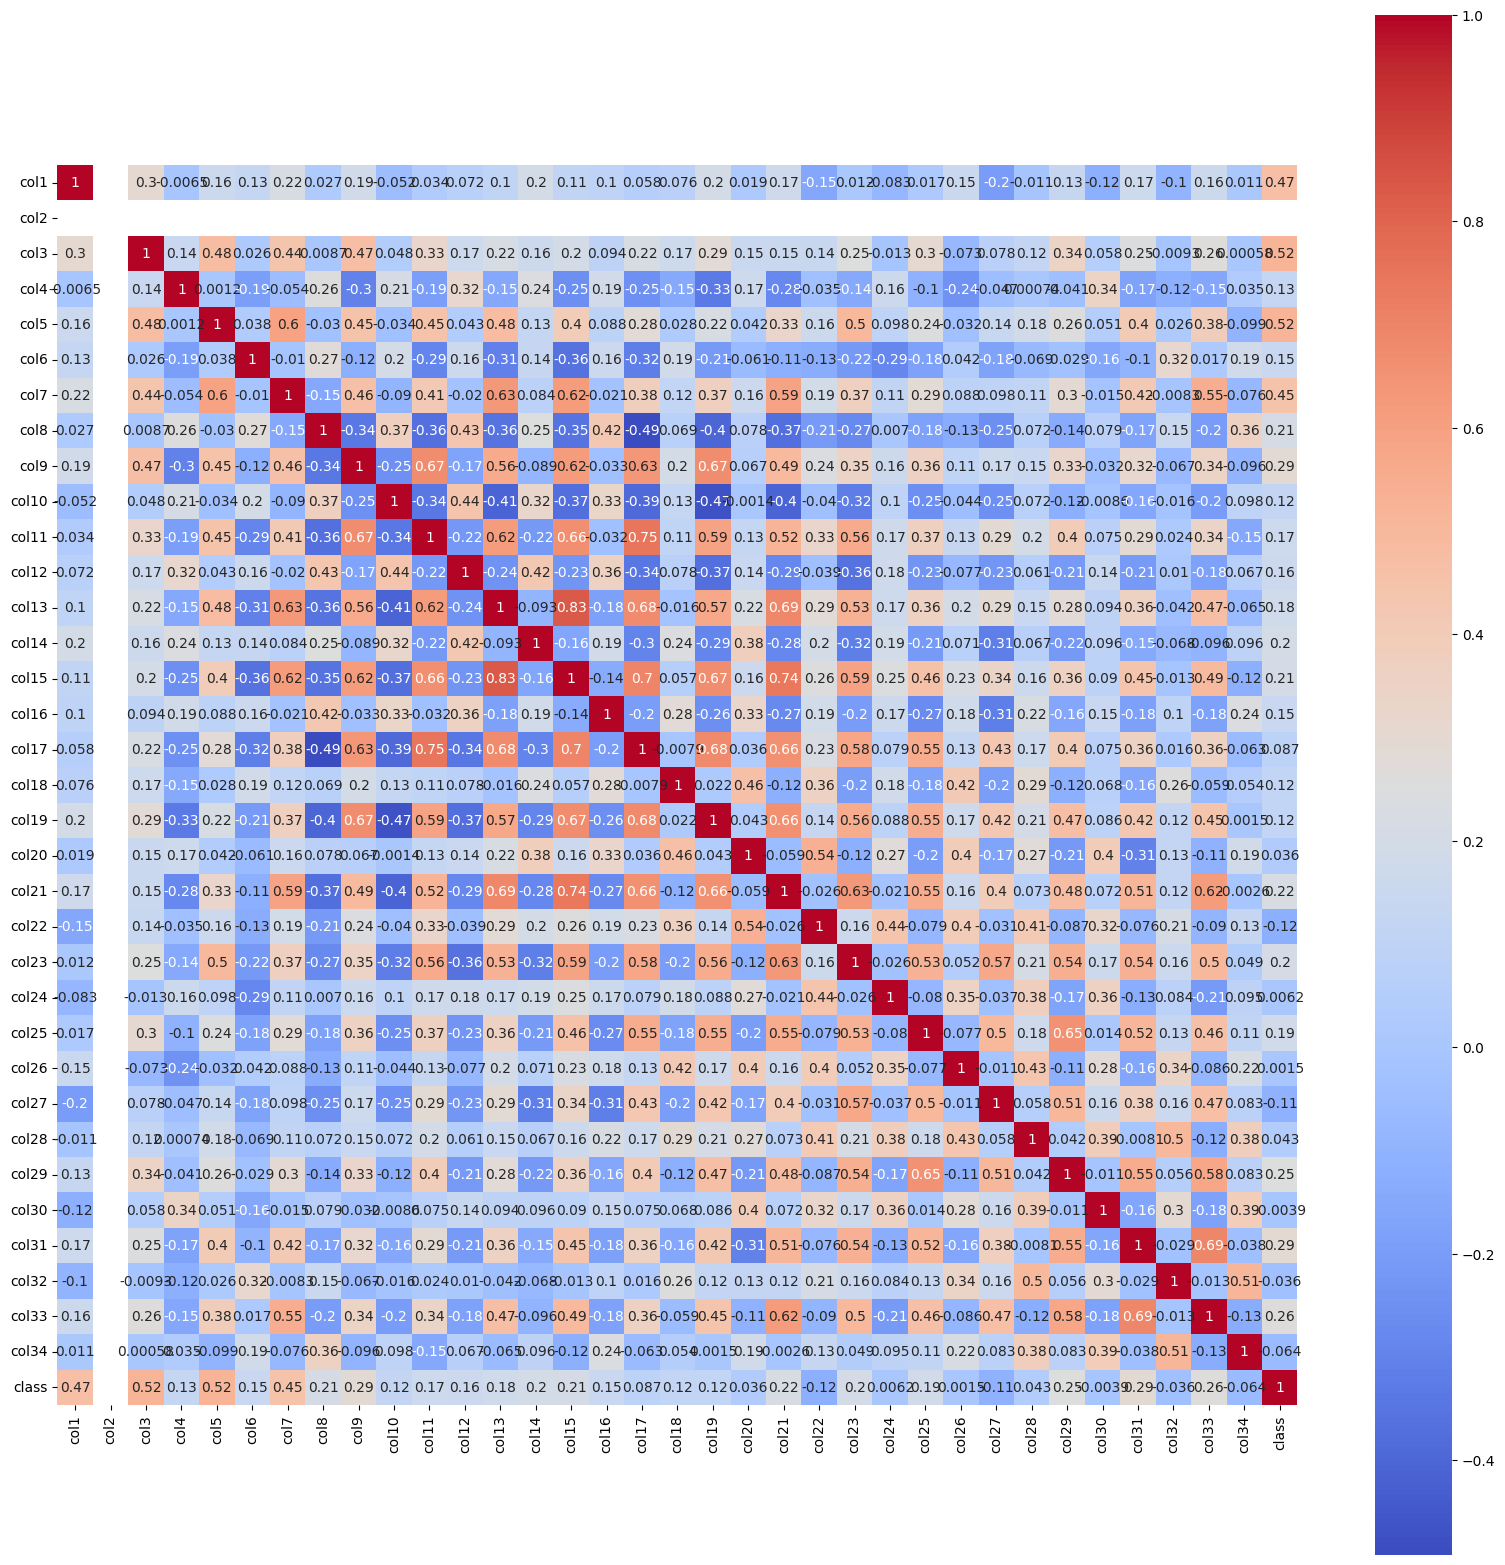

In [13]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', square=True);
plt.show()

# Feature Scaling

### Splitting the dataset into train and test sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 34), (71, 34), (280,), (71,))

In [16]:
y_train.value_counts(), y_test.value_counts()

(class
 1    179
 0    101
 Name: count, dtype: int64,
 class
 1    46
 0    25
 Name: count, dtype: int64)

In [17]:
for col in X_train.columns:
    X_train[col] = (X_train[col] - X_train[col].mean()) / X_train[col].std()
X_train.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
count,2.800000e+02,0.0,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,1.363988e-16,NaN,-1.459150e-16,-1.268826e-17,-8.881784e-17,2.220446e-17,1.015061e-16,3.806479e-17,-5.709718e-17,1.268826e-17,...,-1.586033e-18,2.220446e-17,1.268826e-17,1.268826e-17,-2.854859e-17,6.344132e-18,4.440892e-17,-6.344132e-18,5.075305e-17,-2.061843e-17
std,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.829058e+00,NaN,-3.254261e+00,-2.374007e+00,-3.167772e+00,-2.409598e+00,-3.147672e+00,-2.124868e+00,-3.144189e+00,-2.469930e+00,...,-2.394448e+00,-1.805105e+00,-2.924787e+00,-1.658496e+00,-2.328518e+00,-1.877698e+00,-2.415994e+00,-1.936796e+00,-2.542732e+00,-2.130381e+00
25%,3.522121e-01,NaN,-3.363430e-01,-1.887493e-01,-3.738788e-01,-3.338885e-01,-6.576741e-01,-3.348173e-01,-9.241965e-01,-4.705706e-01,...,-6.725529e-01,-5.141729e-01,-4.491311e-01,-7.027483e-01,-6.304197e-01,-3.926911e-01,-6.442833e-01,-4.548909e-01,-6.642891e-01,-3.577328e-01
50%,3.522121e-01,NaN,4.759326e-01,-6.532609e-02,4.109259e-01,-2.178508e-01,3.488951e-01,-2.109060e-01,3.456543e-01,-3.403815e-01,...,2.492723e-01,1.125471e-01,3.137119e-01,9.373601e-02,1.845654e-01,7.724251e-02,1.729006e-01,-1.075845e-03,1.343121e-01,-1.026741e-02
75%,3.522121e-01,NaN,7.082760e-01,3.413322e-01,7.488093e-01,5.058711e-01,8.602411e-01,6.823284e-01,8.871395e-01,7.014553e-01,...,8.985559e-01,4.509675e-01,8.683231e-01,4.200346e-01,9.022496e-01,3.688122e-01,8.940356e-01,3.938933e-01,8.958938e-01,3.462084e-01
max,3.522121e-01,NaN,7.082760e-01,2.161110e+00,7.488093e-01,1.858259e+00,9.083762e-01,1.670416e+00,9.697369e-01,1.715709e+00,...,1.049342e+00,2.083611e+00,8.890705e-01,1.916448e+00,1.067678e+00,2.032183e+00,1.127427e+00,1.934644e+00,1.214154e+00,2.109846e+00


In [18]:
for col in X_train.columns:
    X_test[col] = (X_test[col] - X_train[col].mean()) / X_train[col].std()
X_test.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
count,7.100000e+01,0.0,71.000000,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01
mean,9.014085e-01,NaN,0.636720,3.422831e-02,0.535788,0.063458,0.542235,0.117859,0.445946,0.185892,...,0.418006,-0.069483,0.572687,-0.059213,0.406819,1.785648e-02,3.085945e-01,-2.094690e-02,3.325063e-01,5.248620e-02
std,3.002347e-01,NaN,0.472421,4.461350e-01,0.553657,0.427733,0.494347,0.499077,0.581421,0.510421,...,0.572826,0.488421,0.484813,0.514821,0.524372,4.946056e-01,6.006305e-01,5.046922e-01,4.857584e-01,4.562225e-01
min,-1.363988e-16,NaN,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.000000e+00,NaN,0.470765,-8.991500e-02,0.200185,-0.012115,0.193600,-0.001335,0.157350,-0.072260,...,0.089555,-0.283185,0.280930,-0.333900,0.052850,-2.100100e-01,-4.440892e-17,-2.517700e-01,-5.075305e-17,-1.356300e-01
50%,1.000000e+00,NaN,0.834270,1.268826e-17,0.765300,0.017560,0.773580,0.037740,0.660380,0.023040,...,0.601540,-0.032290,0.708860,-0.017680,0.554050,-6.344132e-18,3.709300e-01,6.344132e-18,2.894300e-01,2.061843e-17
75%,1.000000e+00,NaN,0.976860,1.788700e-01,0.957935,0.211290,0.877830,0.339435,0.878625,0.678590,...,0.850800,0.146665,1.000000,0.139610,0.805555,1.918600e-01,8.107900e-01,1.740500e-01,7.202050e-01,2.049500e-01
max,1.000000e+00,NaN,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Feature selection
As we have observed there are features that need to be removed for 0 varience and high correlation.

### Dropping constant features

In [19]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.0)
vt.fit(X_train)
sum(vt.get_support())

c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\Dhasharadh Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:119: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


33

In [20]:
X_train.drop(['col2'], axis=1, inplace=True)
print(X_train.columns)
X_test.drop(['col2'], axis=1, inplace=True)
print(X_test.columns)

Index(['col1', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10',
       'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18',
       'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26',
       'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34'],
      dtype='object')
Index(['col1', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10',
       'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18',
       'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26',
       'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34'],
      dtype='object')


### PCA
There seems to be a lot of correlation amoung the features. Some having very high correlation (positive or negative) which will give very bad estimates of the weights after training with a very bad accuracy. So will have to go ahead with PCA to find out or extract independent features that are not correlated with other features.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)

In [22]:
pca.fit(X_train)

PCA(n_components=33)

### Examining the PCA results
The explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures (which we don't require here), this can be used by summing up the ratios to get the total variance in the chosen number of components.

In [23]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

This result shows that all the 33 components added up together give 100% information or varience in the dataset. This is just one case, we will plot the cumulative variences for each number of components from 1 to 33 and figure out acceptible number of priciple components.

In [24]:
nums = np.arange(33)+1
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_train)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

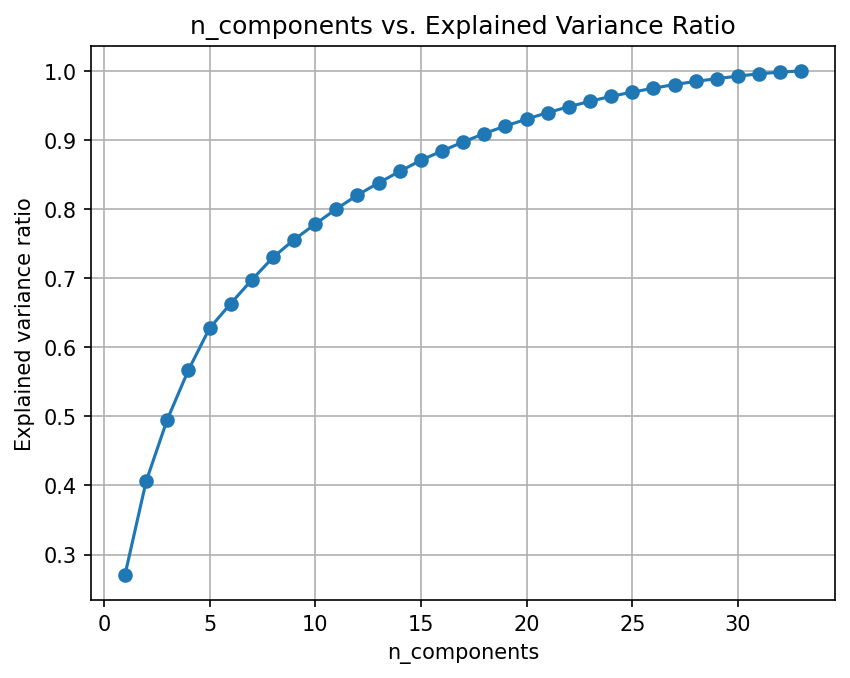

In [25]:
plt.figure(dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio');

Lets take number of components such that 85% of the varience is retained in the data.

In [26]:
req_comp = 0
for i in var_ratio:
    if i>0.85:
        req_comp = var_ratio.index(i)+1
        break
req_comp

14

Now transform the train and test sets to have req_comp number of components. 

In [27]:
pca = PCA(n_components=req_comp)
pca.fit(X_train)
pc_X_train = pca.transform(X_train)
pc_X_test = pca.transform(X_test)

In [28]:
pc_X_train.shape, pc_X_test.shape

((280, 14), (71, 14))

In [47]:
y_train.to_numpy(), y_test.to_numpy()

(array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 

Now the data is good to go. We will now train the models and test their performance, compare the models and conclude.

# Building Models

Since the outputs are two classes that classify whether the atmosphere, i.e., stratosphere is sufficiently able to reflect the radar signals back to earth, we will be using models like,

1. Logistic Regression
2. Linear SVC
3. Random Forest Classifier
4. Neural Networks
5. XGBoost
6. One Class SVM (non-linear SVM)

### Importing required libraries
and creating a method for getting performance analysis.

In [135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

def model_performance(model_name, y_actual, y_pred):
    print("\n",model_name)
    print("Classification report: \n",classification_report(y_actual, y_pred, target_names=LABELS)) 
    print("Confusion matrix:\n",confusion_matrix(y_actual, y_pred, labels=[0,1]))
    
def kcross(classifier, X_train, y_train):
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, verbose=0, scoring="accuracy")
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

By definition a confusion matrix $C$ is such that $C_{{{i,j}}}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus in binary classification, the count of true negatives $C_{{{0,0}}}$, false negatives is $C_{{{1,0}}}$, true positives is $C_{{{1,1}}}$ and false positives is $C_{{{0,1}}}$.

<img src="confusion matrix.jpg" width="520">

Small guide to what a false positive and a false negative means.

<img src="guide for false +- terms.jpg" width="520">

### Logistic regression

In [136]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(pc_X_train, y_train)
lr.score(pc_X_train, y_train)
y_pred = lr.predict(pc_X_test)
model_performance("Logistic Regression", y_test, y_pred)
kcross(lr, pc_X_train, y_train)


 Logistic Regression
Classification report: 
               precision    recall  f1-score   support

         Bad       1.00      0.20      0.33        25
        Good       0.70      1.00      0.82        46

    accuracy                           0.72        71
   macro avg       0.85      0.60      0.58        71
weighted avg       0.80      0.72      0.65        71

Confusion matrix:
 [[ 5 20]
 [ 0 46]]
Accuracy: 87.50 %
Standard Deviation: 7.19 %


The logistic regression model on average has 87.50% accuracy but has high variability of 7.19%. This models seems safe as its precise in calling out bad conditions for further inspection and also lets the radar operators know the conditions are good with 100% certainty but the f1 score suggest otherwise.

### Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=RANDOM_SEED)
rf.fit(pc_X_train, y_train)
y_pred = rf.predict(pc_X_test)
model_performance("Random Forest Classifier", y_test, y_pred)
kcross(rf, pc_X_train, y_train)


 Random Forest Classifier
Classification report: 
               precision    recall  f1-score   support

         Bad       1.00      0.36      0.53        25
        Good       0.74      1.00      0.85        46

    accuracy                           0.77        71
   macro avg       0.87      0.68      0.69        71
weighted avg       0.83      0.77      0.74        71

Confusion matrix:
 [[ 9 16]
 [ 0 46]]
Accuracy: 93.93 %
Standard Deviation: 4.24 %


The random forest classifier performed much better and has a much higher average of 93.93% and a variation of 4.24% which is small. This models seems safe as its precise in calling out bad conditions for further inspection and also lets the radar operators know the conditions are good with 100% certainty certainty but the f1 score suggest otherwise.

### Linear SVC

In [138]:
from sklearn.svm import LinearSVC
svc = LinearSVC(verbose=0, class_weight='balanced', max_iter=5000, random_state=RANDOM_SEED)
svc.fit(pc_X_train, y_train)
y_pred = svc.predict(pc_X_test)
model_performance("Linear SVC", y_test, y_pred)
kcross(svc, pc_X_train, y_train)


 Linear SVC
Classification report: 
               precision    recall  f1-score   support

         Bad       1.00      0.40      0.57        25
        Good       0.75      1.00      0.86        46

    accuracy                           0.79        71
   macro avg       0.88      0.70      0.72        71
weighted avg       0.84      0.79      0.76        71

Confusion matrix:
 [[10 15]
 [ 0 46]]
Accuracy: 85.71 %
Standard Deviation: 7.82 %


The accuracy scores don't look great and is pretty much like the ligistic regression but has the best f1-scores suggesting that its a mch more balanced model compared to the two above.

### Neural Network

In [122]:
from keras.wrappers.scikit_learn import KerasClassifier
def model():
    NN_model = Sequential()
    NN_model.add(InputLayer((pc_X_train.shape[1],)))
    NN_model.add(Dense(5, 'relu'))
    NN_model.add(BatchNormalization())
    NN_model.add(Dense(1, 'sigmoid'))
    NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return NN_model

classifier = KerasClassifier(build_fn=model, epochs=100)
kcross(classifier, pc_X_train, y_train)

Epoch 1/100


C:\Users\Dhasharadh Reddy\AppData\Local\Temp\ipykernel_45632\2204100212.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=model, epochs=100)


8/8 [==============================] - 1s 1ms/step - loss: 0.9197 - accuracy: 0.4206
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8823 - accuracy: 0.4563
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.4365
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8285 - accuracy: 0.4921
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8075 - accuracy: 0.5079
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8018 - accuracy: 0.5238
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7674 - accuracy: 0.5556
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7409 - accuracy: 0.5913
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7373 - accuracy: 0.6111
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.6230
Epoch 11/100
8/8 [=======================

In [118]:
def neural_net_performance(threshold):
  y_pred = (NN_model.predict(pc_X_test, verbose=0).flatten() > threshold).astype(int)
  return accuracy_score(y_test, y_pred)

def best_NN_performance(x):
    thresholds = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
    accuracies = np.array(list(map(neural_net_performance, thresholds)))
    pairs = np.column_stack((thresholds, accuracies))
    print("\n",pairs)
    max_performing_threshold = 0
    for i in pairs:
        if i[1] == np.max(accuracies):
            max_performing_threshold = i[0]
    y_pred = (NN_model.predict(x, verbose=0).flatten() > max_performing_threshold).astype(int)
    print("Best threshold value: ",max_performing_threshold)
    return y_pred

In [126]:
y_pred = best_NN_performance(pc_X_test)
model_performance("Neural Network", y_test, y_pred)


 [[0.1        0.64788732]
 [0.3        0.66197183]
 [0.5        0.66197183]
 [0.7        0.71830986]
 [0.9        0.85915493]]
Best threshold value:  0.9

 Neural Network
Classification report: 
               precision    recall  f1-score   support

         Bad       1.00      0.60      0.75        25
        Good       0.82      1.00      0.90        46

    accuracy                           0.86        71
   macro avg       0.91      0.80      0.83        71
weighted avg       0.88      0.86      0.85        71

Confusion matrix:
 [[15 10]
 [ 0 46]]


The accuracy scores seem to be in the same league as of the logistic regression and linear svc but tops the f1 scores chart by a long mile for both classes with a major improvement in the f1 score of the Bad class.

### XGBoost

In [168]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', missing=1, seed=RANDOM_SEED, n_estimators=80, max_depth=10, gamma=0.1, learning_rate=0.1, scale_pos_weight=2) 
# doesn't give better performance even if you incrase number of estimators or the depth 
xgb.fit(pc_X_train, y_train, verbose=False)
y_pred = xgb.predict(pc_X_test)
model_performance("XGBoost", y_test, y_pred)
kcross(xgb, pc_X_train, y_train)


 XGBoost
Classification report: 
               precision    recall  f1-score   support

         Bad       1.00      0.28      0.44        25
        Good       0.72      1.00      0.84        46

    accuracy                           0.75        71
   macro avg       0.86      0.64      0.64        71
weighted avg       0.82      0.75      0.70        71

Confusion matrix:
 [[ 7 18]
 [ 0 46]]
Accuracy: 92.86 %
Standard Deviation: 3.91 %


The XGBoost seems to have a similar performance of the random forest classifier but with a lower accuracy scores and f1 scores.

Overall the models trained here have a slighly better performance in terms of the accuracy scores compared to the models mentioned in the dataset webpage [Ionosphere](https://archive.ics.uci.edu/dataset/52/ionosphere). The models (simple atleast) seems to have hit a performance barrier maybe because the dataset is pretty small considering the type of complex data it held which required a lot of manipulation. 

So the best model is the Neural Network model then comes with a huge gap the Random Forest Classifier and closely followed by the XGBoost and others with an OK performance.

### Some fun facts
UV, X-ray and shorter wavelengths (or higher frequencies) of solar radiation are ionizing, since photons (energy unit of waves) at these frequencies contain sufficient energy to dislodge an valence electrons from a neutral gas atom or molecule upon absorption. In this process the light electron obtains a high velocity so that the temperature of the created electronic gas is much higher (of the order of thousand K) than the one of ions and neutrals. 

Then we all must be thinking, why does it get colder as we go up a hill? That is because the pressure up a hill (a sufficiently tall one) is lesser than what is down at seas level. Also we are not breaking the ozone layer which blocks almost all the ionizing radiation coming from the Sun thus making it cooler up hill.

The reverse process to ionization is recombination, in which a free electron is "captured" by a positive ion. Recombination occurs spontaneously, and causes the emission of a photon carrying away the energy produced upon recombination. The very beautiful Auroras take place due to this supercharging of electrons of nitrogen and other gases at the thermosphere and lower part (E-layer) of the ionosphere. 

As gas density increases at lower altitudes, the recombination process prevails, since the gas molecules and ions are closer together. The balance between these two processes determines the quantity of ionization present. That is why the electronic instruments that we use will not survive a second up there, they'll get zapped in an instant. That is why satellites and other instruments going to space need protection and one good example is the gold foil which makes them highly durable to the heat and electromagnetic effects from the Sun's radiation.

# Acknowledgements
Links to resources that I used to educate myself more about this topic.

1. [Ionosphere, Wikipedia](https://en.wikipedia.org/wiki/Ionosphere)
2. [Radio Waves and Ionosphere, YouTube](https://youtube.com/playlist?list=PLBcP4ez7xdokYWTZAnOaGSMLtlmv4L9YO)

### Citations
Sigillito,V., Wing,S., Hutton,L., and Baker,K.. (1989). Ionosphere. UCI Machine Learning Repository. https://doi.org/10.24432/C5W01B.